In [78]:
!pip install graphviz

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay 
import graphviz
from IPython.display import display
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("data.csv", header= None)

In [81]:
print(df.shape)
rows = df.shape[0]
columns = df.shape[1]
print(f"Кількість записів : {rows}")
print(f"Кількість полів : {columns}")

(19020, 11)
Кількість записів : 19020
Кількість полів : 11


In [82]:
print(df.head(20))

          0         1       2       3       4         5        6        7   \
0    28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
1    31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
2   162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
3    23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
4    75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   
5    51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887   9.8145   
6    48.2468   17.3565  3.0332  0.2529  0.1515    8.5730  38.0957  10.5868   
7    26.7897   13.7595  2.5521  0.4236  0.2174   29.6339  20.4560  -2.9292   
8    96.2327   46.5165  4.1540  0.0779  0.0390  110.3550  85.0486  43.1844   
9    46.7619   15.1993  2.5786  0.3377  0.1913   24.7548  43.8771  -6.6812   
10   62.7766   29.9104  3.3331  0.2475  0.1261  -33.9065  57.5848  23.7710   
11   18.8562   16.4600  2.4385  0.5282  0.2933   25.1269  -6.540

In [83]:
X = df.drop([10], axis=1)
y = df[10]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,        
    random_state=129   
)

## Результати моделей

Навчання завершено


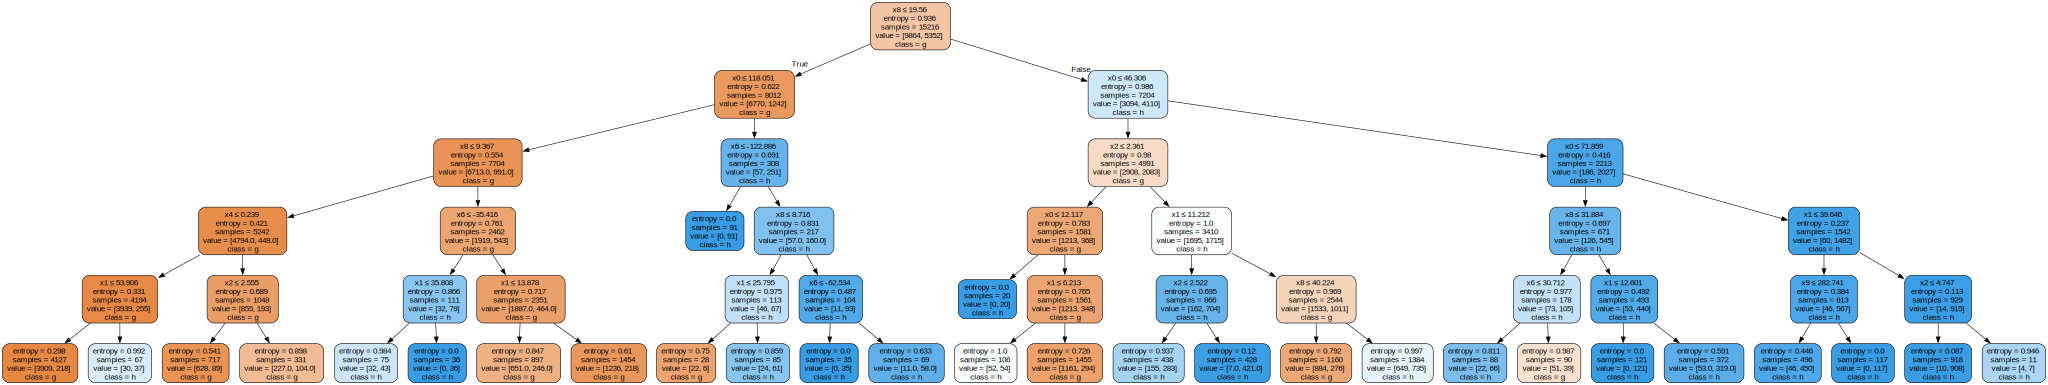

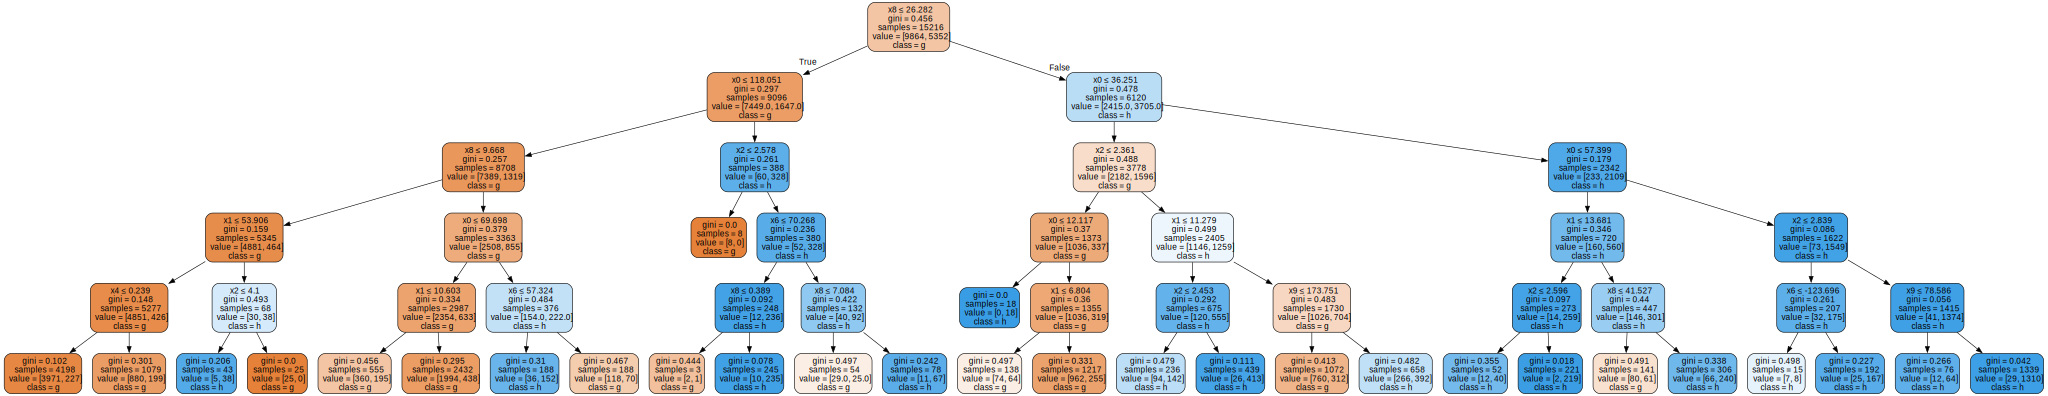

In [84]:
model1 = DecisionTreeClassifier(max_depth=5, random_state=129, criterion = "entropy")
model2 = DecisionTreeClassifier(max_depth=5, random_state=129, criterion = "gini")

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
print("Навчання завершено")

class_names = [str(i) for i in y.unique()]
feature_names=[f"x{i}" for i in range(X.shape[1])]
dot_data1 = export_graphviz(model1, out_file = None, feature_names=feature_names, 
    class_names = class_names, filled = True, rounded = True, special_characters=True)
dot_data2 = export_graphviz(model2, out_file = None, feature_names=feature_names, 
    class_names = class_names, filled = True, rounded = True, special_characters=True)
graph1 = graphviz.Source(dot_data1)
graph2 = graphviz.Source(dot_data2)
display(graph1, graph2)

Результати для моделі з критерієм ентропія: 
Accuracy для навчальної вибірки: 0.8301130389064143
Кластфікаційний звіт для тестової вибірки:
              precision    recall  f1-score   support

           g       0.85      0.88      0.86      2468
           h       0.76      0.71      0.73      1336

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



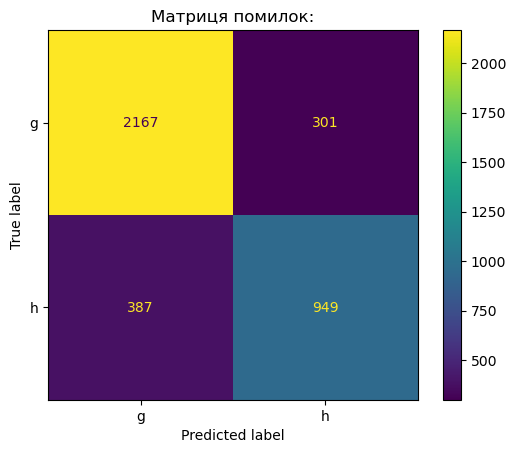

Результати для моделі з критерієм Gini: 
Accuracy для навчальної вибірки: 0.8391167192429022
Кластфікаційний звіт для тестової вибірки:
              precision    recall  f1-score   support

           g       0.82      0.93      0.88      2468
           h       0.84      0.63      0.72      1336

    accuracy                           0.83      3804
   macro avg       0.83      0.78      0.80      3804
weighted avg       0.83      0.83      0.82      3804



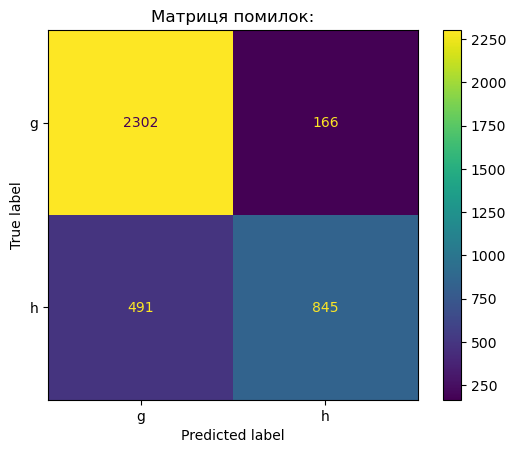

In [85]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print("Accuracy для навчальної вибірки:", train_accuracy)
    y_test_pred = model.predict(X_test)
    # test_accuracy = accuracy_score(y_test, y_test_pred)
    # print("Accuracy для тестової вибірки:", test_accuracy)

    print("Кластфікаційний звіт для тестової вибірки:")
    print(classification_report(y_test,y_test_pred,zero_division=0))

    ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
    plt.title("Матриця помилок:")
    plt.show()

print("Результати для моделі з критерієм ентропія: ")
evaluate_model(model1, X_train, y_train, X_test, y_test)
print("Результати для моделі з критерієм Gini: ")
evaluate_model(model2, X_train, y_train, X_test, y_test)

## Обмеження максимальної листів внутрішнього вузла

Навчання завершено


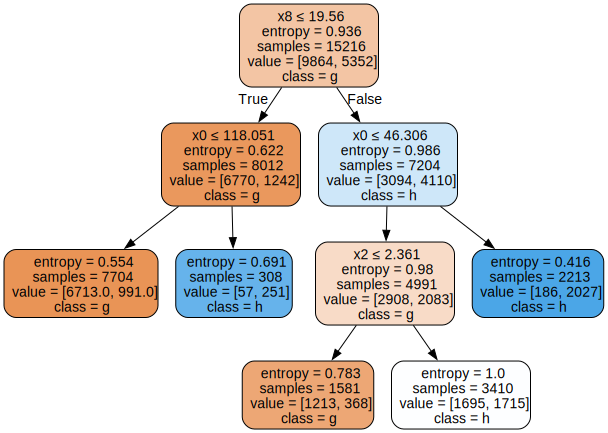

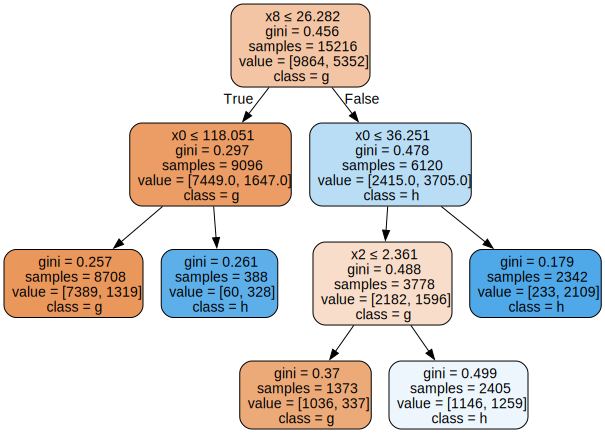

Результати для моделі з критерієм ентропія та обмеженням максимальної кількості листів: 
Accuracy для навчальної вибірки: 0.7833201892744479
Кластфікаційний звіт для тестової вибірки:
              precision    recall  f1-score   support

           g       0.85      0.80      0.82      2468
           h       0.67      0.74      0.70      1336

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



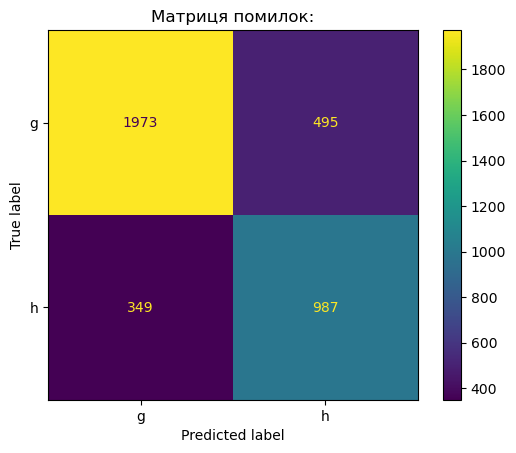

Результати для моделі з критерієм Giniта обмеженням максимальної кількості листів:  
Accuracy для навчальної вибірки: 0.7965956887486856
Кластфікаційний звіт для тестової вибірки:
              precision    recall  f1-score   support

           g       0.84      0.85      0.84      2468
           h       0.72      0.69      0.70      1336

    accuracy                           0.80      3804
   macro avg       0.78      0.77      0.77      3804
weighted avg       0.79      0.80      0.80      3804



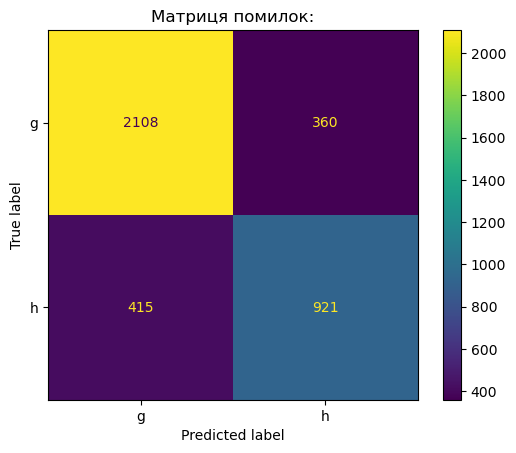

In [86]:
model1_maxl = DecisionTreeClassifier(max_depth=5, random_state=129, criterion = "entropy", max_leaf_nodes=5)
model2_maxl = DecisionTreeClassifier(max_depth=5, random_state=129, criterion = "gini",  max_leaf_nodes=5)

model1_maxl.fit(X_train, y_train)
model2_maxl.fit(X_train, y_train)
print("Навчання завершено")

class_names = [str(i) for i in y.unique()]
feature_names=[f"x{i}" for i in range(X.shape[1])]
dot_data1 = export_graphviz(model1_maxl, out_file = None, feature_names=feature_names, 
    class_names = class_names, filled = True, rounded = True, special_characters=True)
dot_data2 = export_graphviz(model2_maxl, out_file = None, feature_names=feature_names, 
    class_names = class_names, filled = True, rounded = True, special_characters=True)
graph1 = graphviz.Source(dot_data1)
graph2 = graphviz.Source(dot_data2)
display(graph1, graph2)
print("Результати для моделі з критерієм ентропія та обмеженням максимальної кількості листів: ")
evaluate_model(model1_maxl, X_train, y_train, X_test, y_test)
print("Результати для моделі з критерієм Giniта обмеженням максимальної кількості листів:  ")
evaluate_model(model2_maxl, X_train, y_train, X_test, y_test)

## Обмеження мінімальної кількості елеменнтів внутрішнього вузла

Навчання завершено


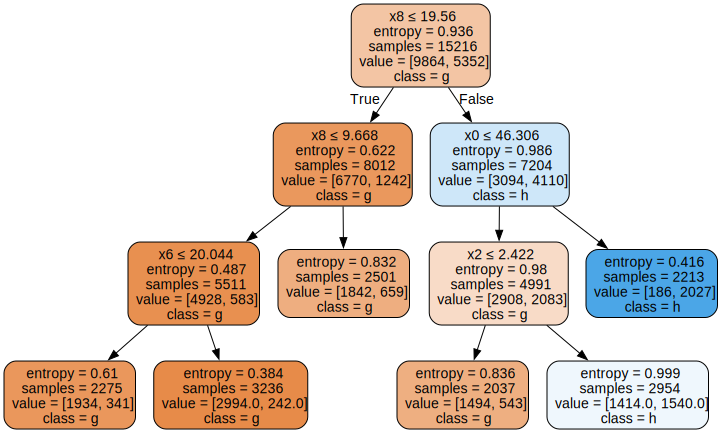

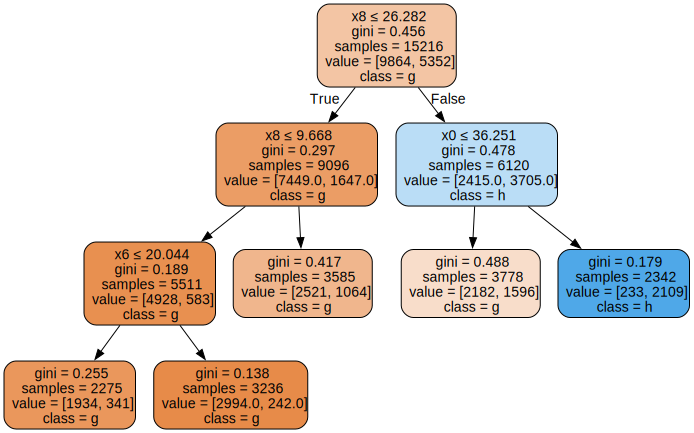

Результати для моделі з критерієм ентропія та обмеженням та мінімальної кількості елементів: 
Accuracy для навчальної вибірки: 0.7775368033648791
Кластфікаційний звіт для тестової вибірки:
              precision    recall  f1-score   support

           g       0.82      0.84      0.83      2468
           h       0.69      0.66      0.68      1336

    accuracy                           0.78      3804
   macro avg       0.76      0.75      0.75      3804
weighted avg       0.78      0.78      0.78      3804



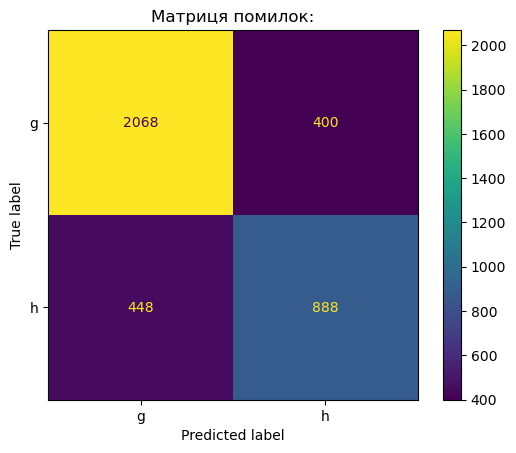

Результати для моделі з критерієм Gini та обмеженням та мінімальної кількості елементів: 
Accuracy для навчальної вибірки: 0.7715562565720294
Кластфікаційний звіт для тестової вибірки:
              precision    recall  f1-score   support

           g       0.76      0.97      0.85      2468
           h       0.90      0.42      0.57      1336

    accuracy                           0.78      3804
   macro avg       0.83      0.70      0.71      3804
weighted avg       0.81      0.78      0.75      3804



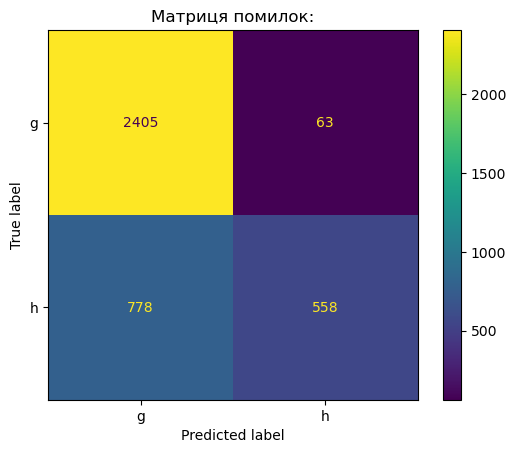

In [87]:
model1_mins = DecisionTreeClassifier(max_depth=5, random_state=129, criterion = "entropy", min_samples_leaf=2000)
model2_mins = DecisionTreeClassifier(max_depth=5, random_state=129, criterion = "gini",  min_samples_leaf=2000)

model1_mins.fit(X_train, y_train)
model2_mins.fit(X_train, y_train)
print("Навчання завершено")

class_names = [str(i) for i in y.unique()]
feature_names=[f"x{i}" for i in range(X.shape[1])]
dot_data1 = export_graphviz(model1_mins, out_file = None, feature_names=feature_names, 
    class_names = class_names, filled = True, rounded = True, special_characters=True)
dot_data2 = export_graphviz(model2_mins, out_file = None, feature_names=feature_names, 
    class_names = class_names, filled = True, rounded = True, special_characters=True)
graph1 = graphviz.Source(dot_data1)
graph2 = graphviz.Source(dot_data2)
display(graph1, graph2)
print("Результати для моделі з критерієм ентропія та обмеженням та мінімальної кількості елементів: ")
evaluate_model(model1_mins, X_train, y_train, X_test, y_test)
print("Результати для моделі з критерієм Gini та обмеженням та мінімальної кількості елементів: ")
evaluate_model(model2_mins, X_train, y_train, X_test, y_test)

## Важливість ознак

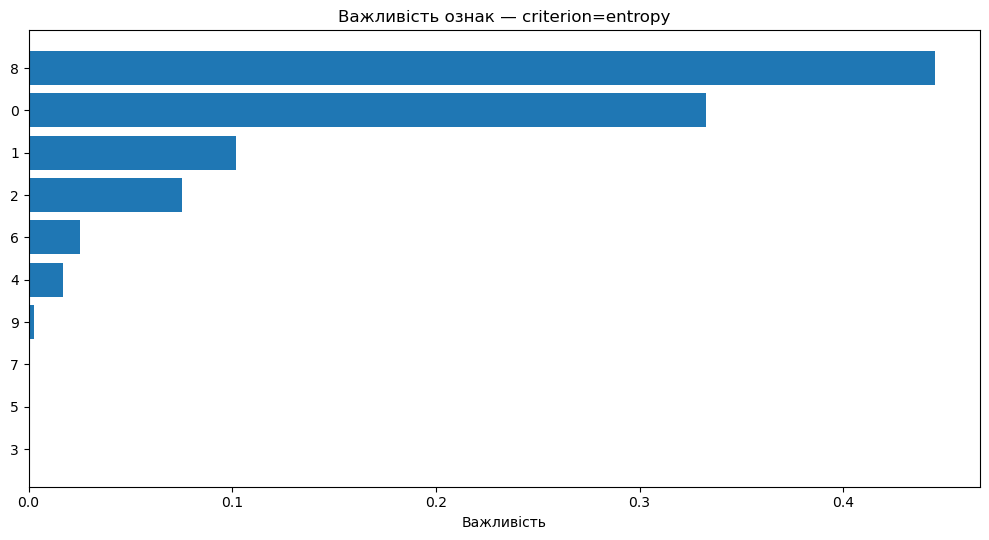

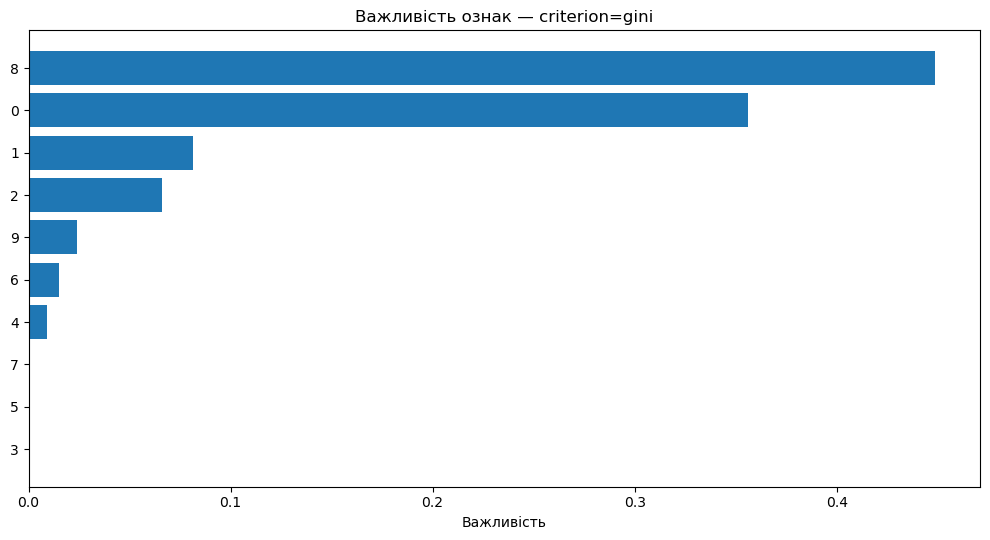

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importances(model, X, top_n=None, title=None):
    importances = getattr(model, "feature_importances_", None)
    try:
        feature_names = X.columns.astype(str).tolist()
    except AttributeError:
        feature_names = [f"x{i}" for i in range(X.shape[1])]
    order = np.argsort(importances)[::-1]
    if top_n is not None:
        order = order[:top_n]
    imp = importances[order]
    names = [feature_names[i] for i in order]
    plt.figure(figsize=(10, max(4, 0.35*len(names)+2)))
    plt.barh(range(len(names)), imp)          
    plt.yticks(range(len(names)), names)
    plt.gca().invert_yaxis()                 
    plt.xlabel("Важливість")
    plt.title(title)
    plt.tight_layout()
    plt.show()


plot_feature_importances(model1, X_train, top_n=20, title="Важливість ознак — criterion=entropy")
plot_feature_importances(model2, X_train, top_n=20, title="Важливість ознак — criterion=gini")


## Перевірка зміни результатів від вилучення нневажливих ознак

Навчання завершено


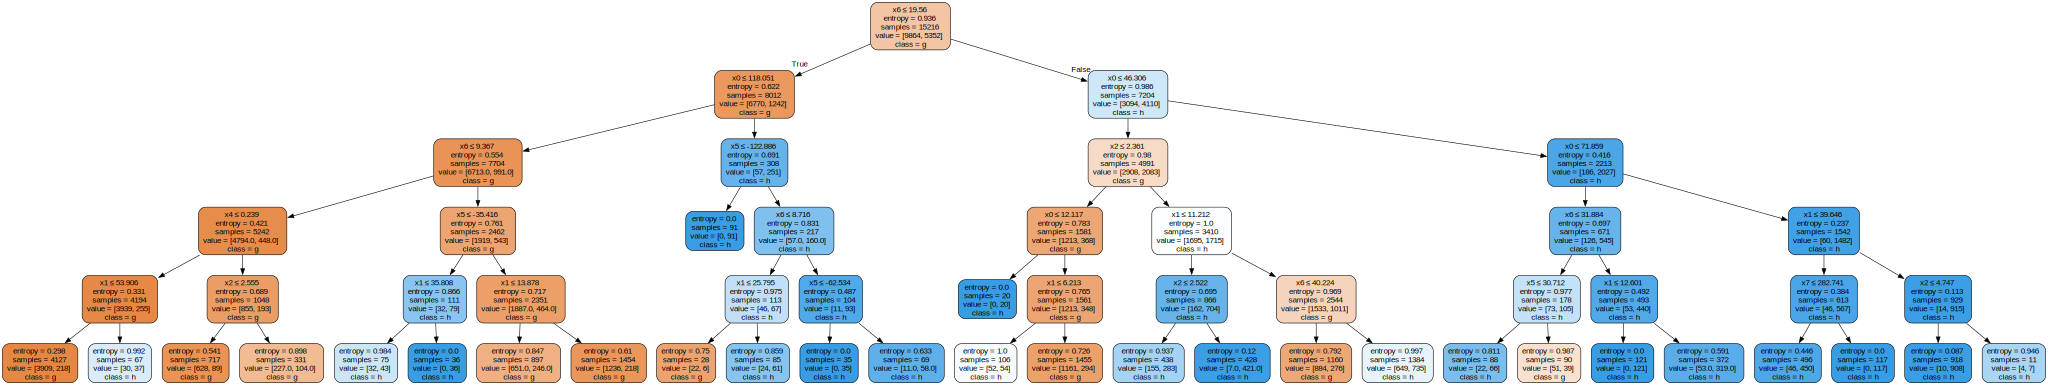

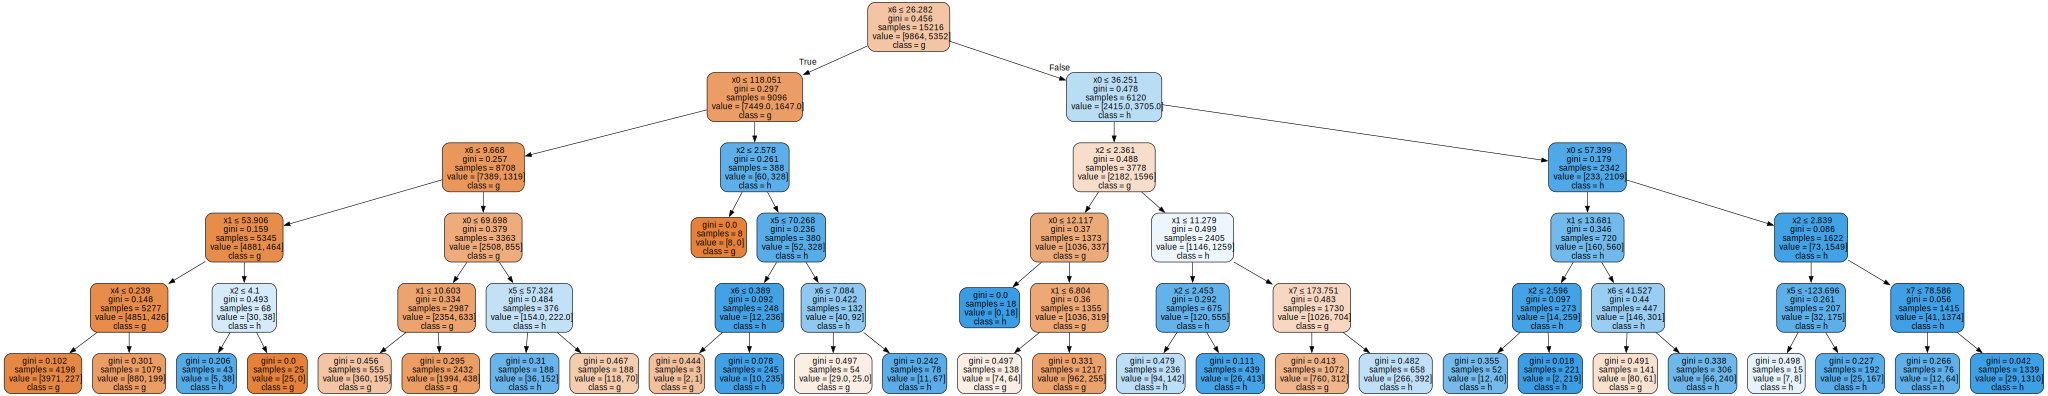

Результати для моделі з критерієм ентропія: 
Accuracy для навчальної вибірки: 0.8301130389064143
Кластфікаційний звіт для тестової вибірки:
              precision    recall  f1-score   support

           g       0.85      0.88      0.86      2468
           h       0.76      0.71      0.73      1336

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



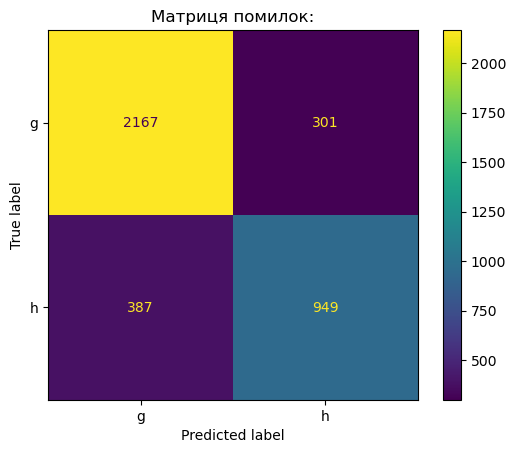

Результати для моделі з критерієм Gini: 
Accuracy для навчальної вибірки: 0.8391167192429022
Кластфікаційний звіт для тестової вибірки:
              precision    recall  f1-score   support

           g       0.82      0.93      0.88      2468
           h       0.84      0.63      0.72      1336

    accuracy                           0.83      3804
   macro avg       0.83      0.78      0.80      3804
weighted avg       0.83      0.83      0.82      3804



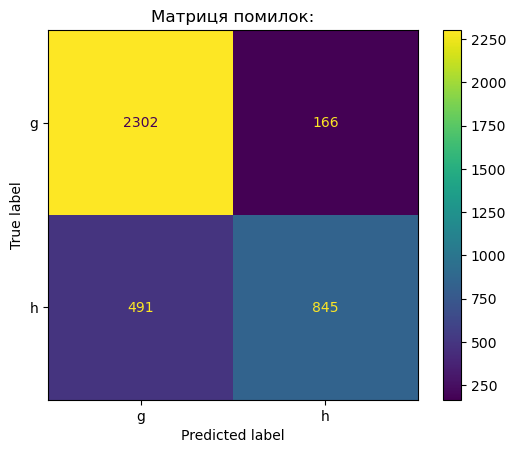

In [89]:
model1 = DecisionTreeClassifier(max_depth=5, random_state=129, criterion = "entropy")
model2 = DecisionTreeClassifier(max_depth=5, random_state=129, criterion = "gini")
cols_to_drop = X.columns[[5, 7]] 
X = X.drop(columns=cols_to_drop, axis = 1 )
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,        
    random_state=129   
)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
print("Навчання завершено")

class_names = [str(i) for i in y.unique()]
feature_names=[f"x{i}" for i in range(X.shape[1])]
dot_data1 = export_graphviz(model1, out_file = None, feature_names=feature_names, 
    class_names = class_names, filled = True, rounded = True, special_characters=True)
dot_data2 = export_graphviz(model2, out_file = None, feature_names=feature_names, 
    class_names = class_names, filled = True, rounded = True, special_characters=True)
graph1 = graphviz.Source(dot_data1)
graph2 = graphviz.Source(dot_data2)
display(graph1, graph2)

print("Результати для моделі з критерієм ентропія: ")
evaluate_model(model1, X_train, y_train, X_test, y_test)
print("Результати для моделі з критерієм Gini: ")
evaluate_model(model2, X_train, y_train, X_test, y_test)